In [37]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

SEED = 42
scoring = 'r2'

Wall time: 999 µs


## Load Database/Import Data 

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.drop(df.columns[0],axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df = df[[c for c in df if c not in ['price']] + ['price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [7]:
encoder = LabelEncoder()

In [8]:
df['cut'] = encoder.fit_transform(df['cut'])

In [9]:
cut_mappings = {index : label for index, label in enumerate(encoder.classes_)}
cut_mappings

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

In [10]:
df['color'] = encoder.fit_transform(df['color'])

In [11]:
color_mappings = {index : label for index, label in enumerate(encoder.classes_)}
color_mappings

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [12]:
df['clarity'] = encoder.fit_transform(df['clarity'])

In [13]:
clarity_mappings = {index : label for index, label in enumerate(encoder.classes_)}
clarity_mappings

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

In [14]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


## Exploratory Data Analysis (EDA)

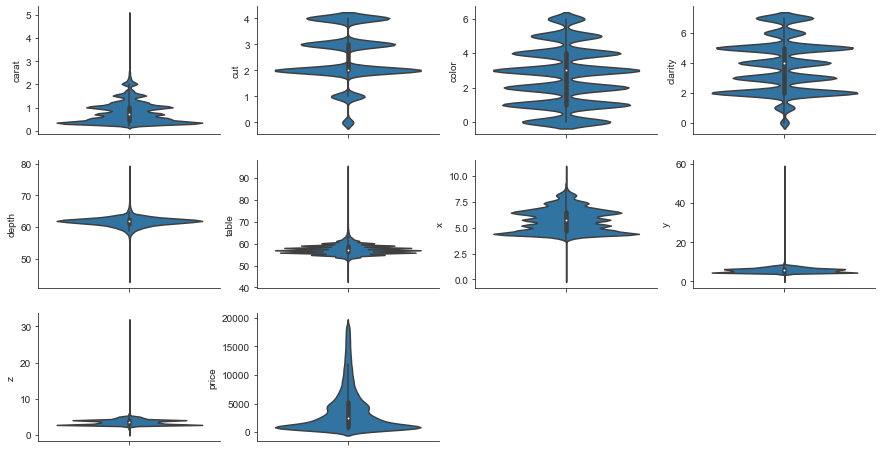

In [16]:
features = list(df.columns)

plt.figure(figsize=(15, 8))
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    sns.violinplot(data=df, y=feature)  
    
sns.despine()

In [33]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [17]:
#drop the rows with value 0 in x,y,z
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [18]:
df.shape

(53920, 10)

In [36]:
df.isna().any().any()
# df.isna().sum()

False

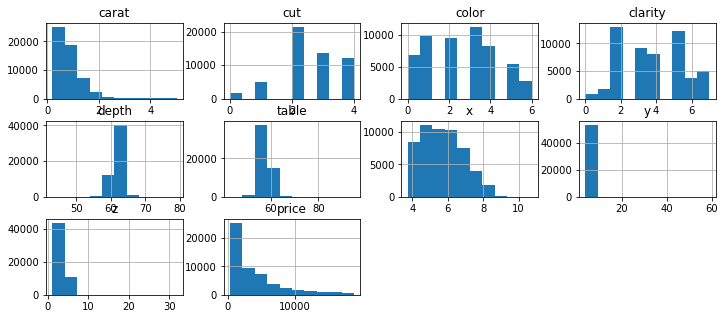

In [37]:
df.hist(figsize=(12,5), layout=(3,4))
plt.show()

In [ ]:
#Generate Kernel Density Estimate plot using Gaussian kernels.
df.plot.bar(figsize=(12,5), layout=(3,4), subplots=True)
plt.show()

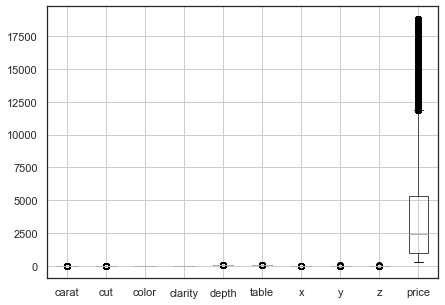

In [223]:
df.boxplot(figsize=(7,5))
plt.show()

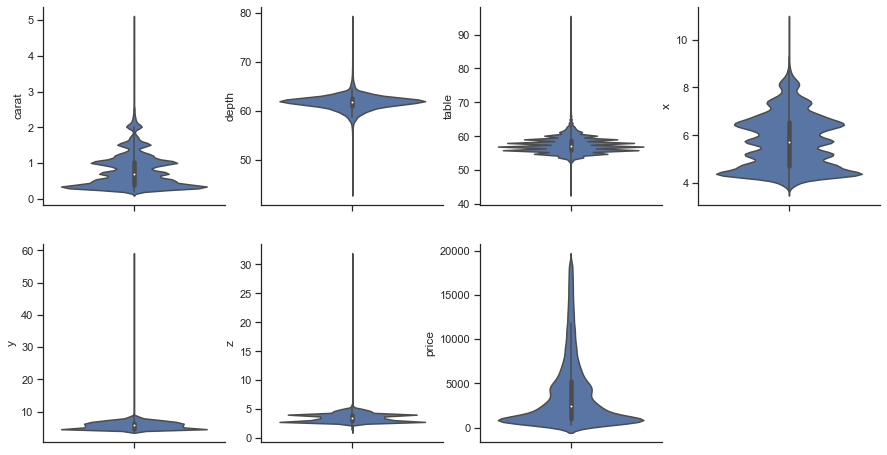

In [224]:
features = list(df.columns)[0:1] + list(df.columns)[4:]

plt.figure(figsize=(15, 8))
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df, y=feature)  
    
sns.despine()

In [186]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
dtype: int64

In [88]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.11       1
3.50       1
3.67       1
5.01       1
3.51       1
Name: carat, Length: 273, dtype: int64

In [187]:
df['depth'].value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
52.2       1
71.2       1
72.9       1
53.1       1
53.0       1
Name: depth, Length: 184, dtype: int64

In [188]:
df['table'].value_counts()

56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
64.2       1
79.0       1
64.3       1
63.3       1
65.4       1
Name: table, Length: 127, dtype: int64

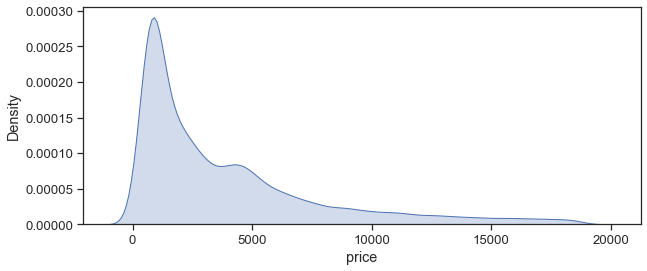

In [189]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(df['price'], shade=True)

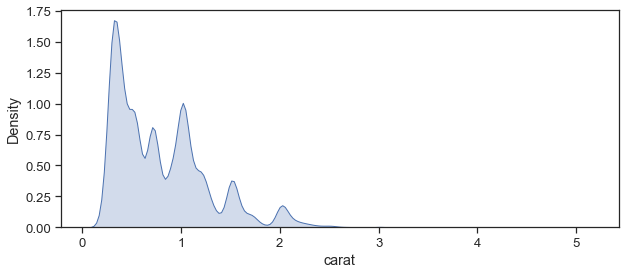

In [190]:
plt.figure(figsize=(10, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
_ = sns.kdeplot(df['carat'], shade=True)

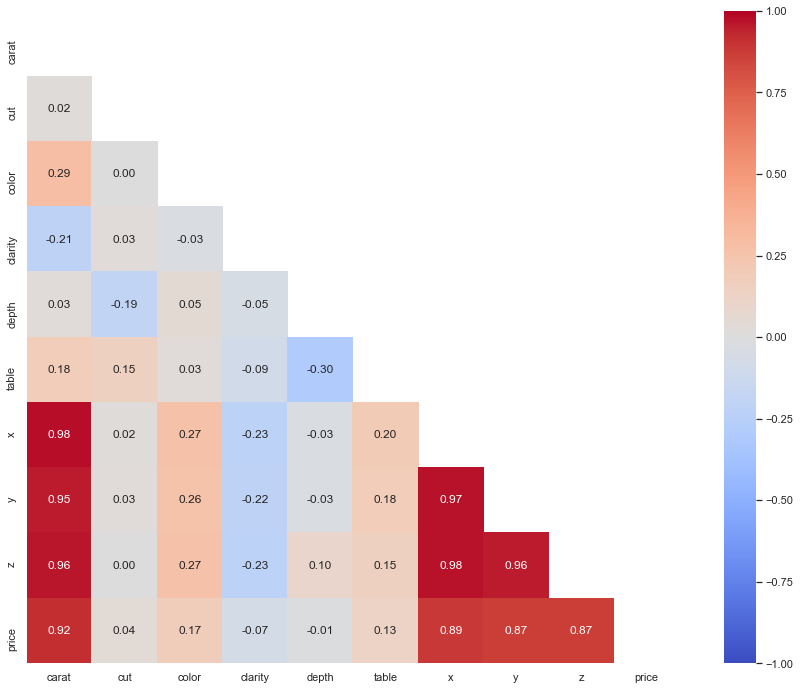

In [225]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

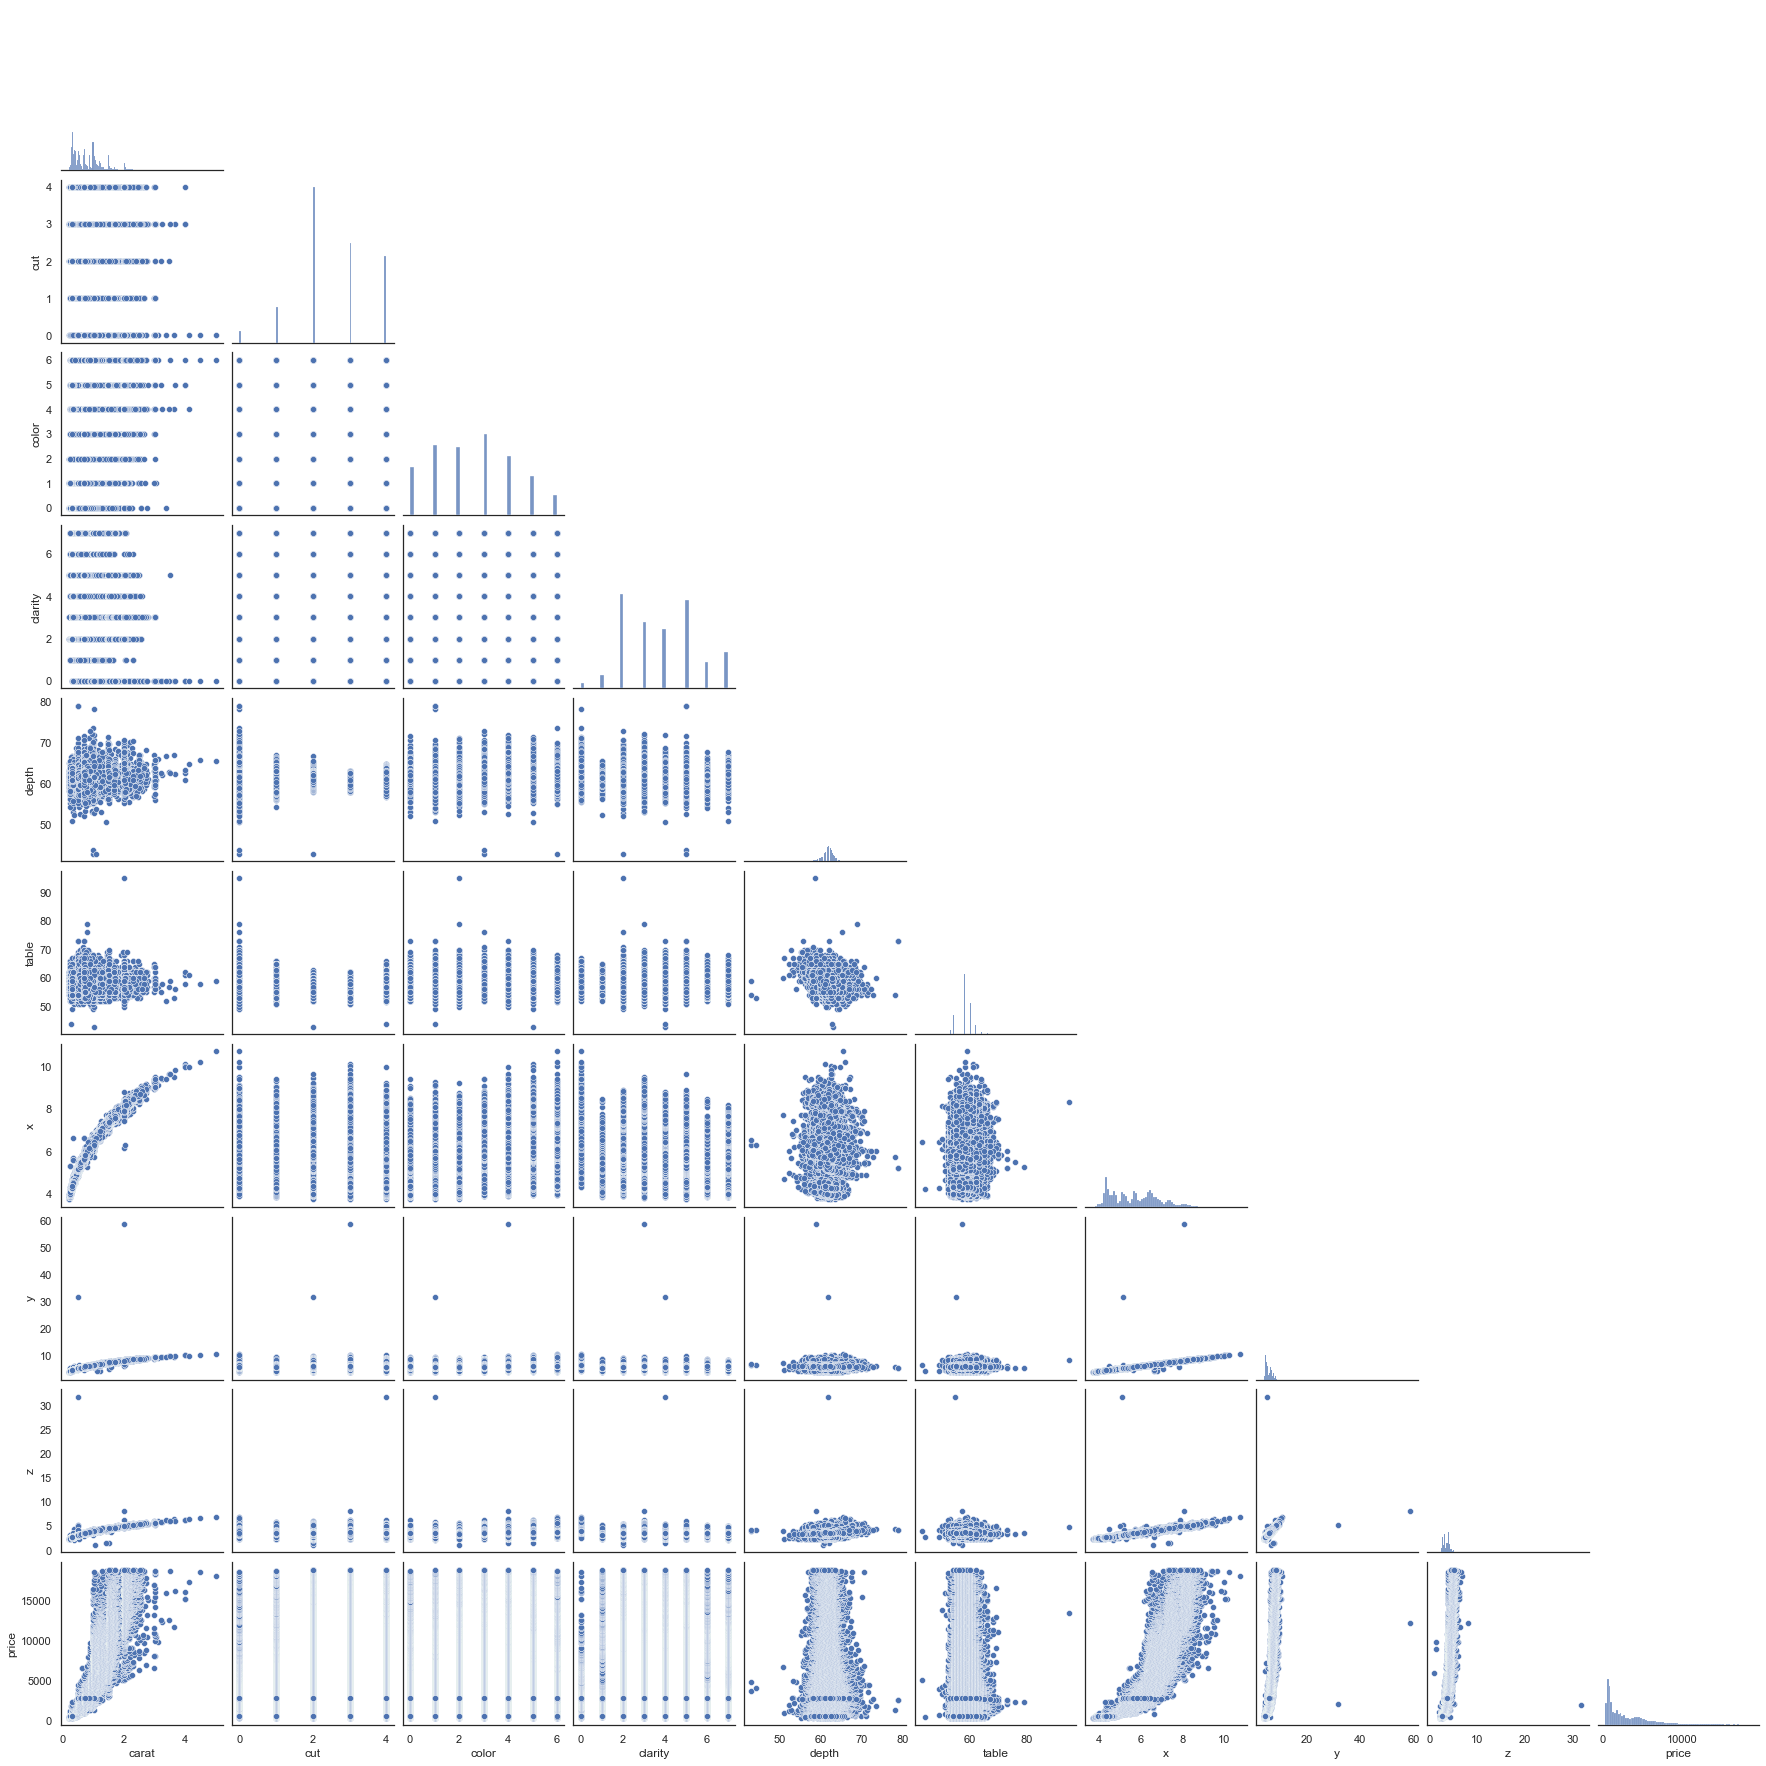

In [228]:
%%time
_ = sns.pairplot(df, corner=True, palette = 'inferno')

Wall time: 489 ms


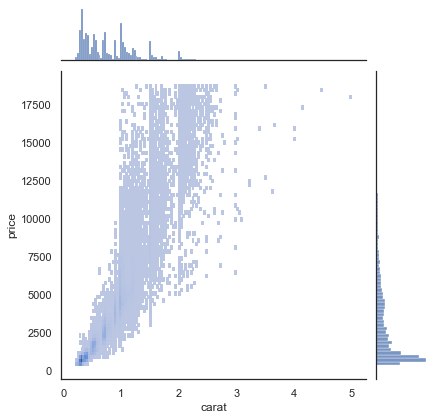

In [227]:
%%time
_ = sns.jointplot(x="carat", y="price", data=df, kind="hist")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="reg")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="kde")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="resid")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="scatter")
#_ = sns.jointplot(x="carat", y="price", data=df, hue="depth")


## Data Preprocessing/Feature Engineering

## Model Selection

### Split Data (Features/Target, Train/Validation/Testing)

In [19]:
X = df.drop(['price'], axis=1)
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

#### Feature Scaling (Normalization/Standardization)

In [21]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-1.02798729,  0.43263486, -0.35220021, ..., -1.22347292,
        -1.17364017, -1.26879511],
       [ 1.03410178, -0.54196198,  0.82218423, ...,  1.10235281,
         1.11937836,  1.12441787],
       [ 1.51806146,  0.43263486, -0.35220021, ...,  1.44988999,
         1.3373459 ,  1.49925846],
       ...,
       [ 0.02409897,  0.43263486, -1.52658465, ...,  0.37163362,
         0.2736643 ,  0.10081472],
       [-1.02798729,  0.43263486, -0.93939243, ..., -1.27694018,
        -1.21723368, -1.23996122],
       [-0.01798448,  0.43263486, -1.52658465, ...,  0.13994216,
         0.19519598,  0.14406556]])

### Train a Model
### (start with Logistic Regression for Classification problems, Linear Regression for Regression problems)

In [23]:
results = []
names = []

In [29]:
%%time
lr_baseline = LinearRegression()
scores = cross_val_score(lr_baseline, X_train,y_train, scoring='r2', cv=3,n_jobs=-1)
baseline_mean_score = scores.mean()
print("Baseline Model's score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
results.append(scores)
names.append('LR')

Baseline Model's score: 0.86 (avg) 0.04 (std)
Wall time: 1.95 s


In [25]:
results

[array([0.88144131, 0.88555539, 0.79843681])]

In [26]:
names

['LR']

### Evaluate Multiple Models and Select Best Model

In [39]:
%%time
KNNReg = KNeighborsRegressor()
scores = cross_val_score(KNNReg, X_train,  y_train, cv=5,  scoring=scoring)
msg = ("KNN Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('KNN')

KNN Mean score: 0.95 (avg) 0.00 (std)
Wall time: 2.24 s


In [40]:
results

[array([0.88144131, 0.88555539, 0.79843681]),
 array([0.88144131, 0.88555539, 0.79843681]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ])]

In [41]:
names

['LR', 'LR', 'KNN', 'KNN']

In [42]:
%%time
MLPReg = MLPRegressor()
scores = cross_val_score(MLPReg, X_train,  y_train, cv=3,  scoring=scoring)
msg = ("MLPReg Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('MLP')

MLPReg Mean score: 0.91 (avg) 0.02 (std)
Wall time: 1min 1s


In [43]:
results

[array([0.88144131, 0.88555539, 0.79843681]),
 array([0.88144131, 0.88555539, 0.79843681]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.92057306, 0.92020056, 0.88372155])]

In [44]:
names

['LR', 'LR', 'KNN', 'KNN', 'MLP']

In [45]:
%%time 
#LogR = LogisticRegression() #??? every time run computer hang!
#scores = cross_val_score(LogR, X_train,  y_train, cv=3,  scoring=scoring)
#msg = ("LogR Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
#print(msg)

Wall time: 0 ns


In [46]:
%%time
DT = DecisionTreeRegressor()
scores = cross_val_score(DT, X_train,  y_train, cv=3,  scoring=scoring)
msg = ("DT Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('DT')

DT Mean score: 0.96 (avg) 0.00 (std)
Wall time: 462 ms


In [47]:
results

[array([0.88144131, 0.88555539, 0.79843681]),
 array([0.88144131, 0.88555539, 0.79843681]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.92057306, 0.92020056, 0.88372155]),
 array([0.96202354, 0.96090391, 0.96171737])]

In [48]:
names

['LR', 'LR', 'KNN', 'KNN', 'MLP', 'DT']

In [49]:
%%time
RF = RandomForestRegressor()
scores = cross_val_score(RF, X_train,  y_train, cv=3,  scoring=scoring)
msg = ("RF Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('RF')

RF Mean score: 0.98 (avg) 0.00 (std)
Wall time: 28.7 s


In [50]:
results

[array([0.88144131, 0.88555539, 0.79843681]),
 array([0.88144131, 0.88555539, 0.79843681]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.95437322, 0.95583281, 0.95300328, 0.95667125, 0.9549064 ]),
 array([0.92057306, 0.92020056, 0.88372155]),
 array([0.96202354, 0.96090391, 0.96171737]),
 array([0.98020208, 0.97844941, 0.97926946])]

In [51]:
names

['LR', 'LR', 'KNN', 'KNN', 'MLP', 'DT', 'RF']

In [52]:
# %%time
# SVReg = SVR()
# scores = cross_val_score(SVReg, X_train,  y_train, cv=3,  scoring=scoring)
# msg = ("SVR Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
# print(msg)
# results.append(scores)
# names.append('SVR')

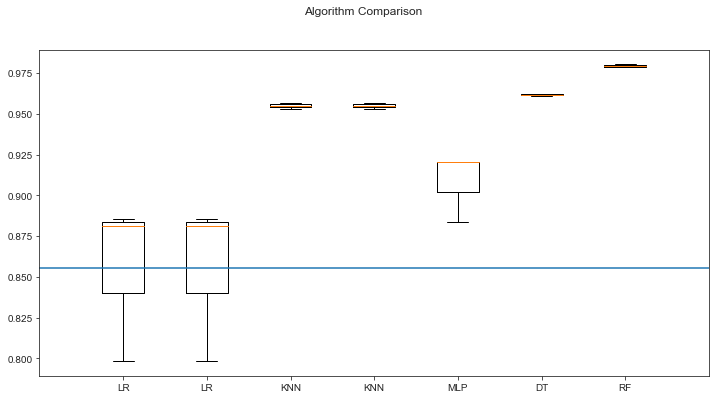

In [53]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot([-2,10], [baseline_mean_score, baseline_mean_score])
plt.xlim(0, 8)
plt.show()

In [96]:
results = results[:5]

In [97]:
results

[array([0.88144131, 0.88555539, 0.79843681]),
 array([0.95168345, 0.95165909, 0.95234045]),
 array([0.92185116, 0.92505242, 0.88470041]),
 array([0.96099259, 0.96136794, 0.96198915]),
 array([0.97997479, 0.9787441 , 0.97932953])]

In [98]:
names = names[:5]

In [99]:
names

['LR', 'KNN', 'MLP', 'DT', 'RF']

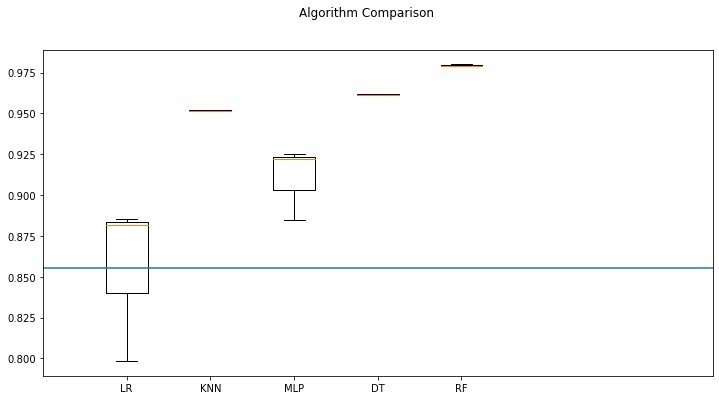

In [100]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot([-2,10], [baseline_mean_score, baseline_mean_score])
plt.xlim(0, 8)
plt.show()

### Hyperparameter Fine-tuning for final selected model # Random Forest

### Evaluate the fine-tuned Model (whether it will generalize well with unseen data - testing dataset)

## Post-mortem Analysis

In [31]:
%%time
rf = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=SEED)
rf.fit(X_train, y_train)

Wall time: 7.03 s


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [57]:
y_pred = rf.predict(X_test)
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Final Model (RandomForestRegressor) Metrics -')
print('\tR2 Score:', r2score)
print('\tMean Absolute Error:', mae)
print('\tMean Square Error:', mse)

Final Model (RandomForestRegressor) Metrics -
	R2 Score: 0.9818385342606271
	Mean Absolute Error: 267.6550920970515
	Mean Square Error: 283229.91802286595


In [32]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

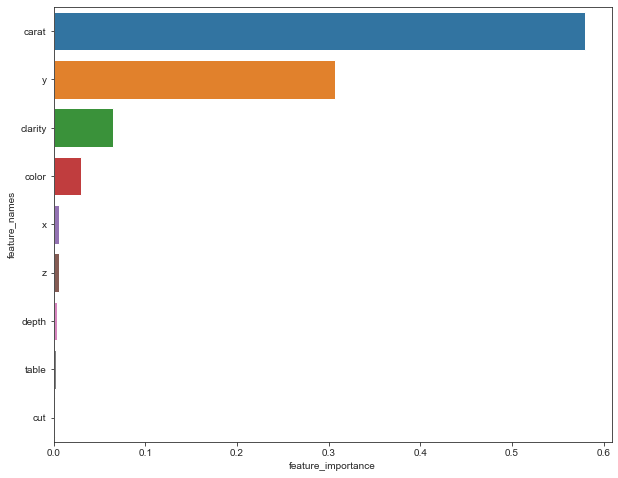

In [33]:
plt.figure(figsize=(10,8))
_ = sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

In [34]:
own_pred = rf.predict(X_test)
for n in range(100):
    print("target value ",str(own_pred[n]), "VS", str(y_test.iloc[n]),"% as", (y_test.iloc[n]) / (own_pred[n])*100)
    n += 1

target value  1025.1166666666668 VS 874 % as 85.25858845334676
target value  8193.29 VS 9273 % as 113.17797856538702
target value  11575.44 VS 11743 % as 101.44754756622643
target value  1064.93 VS 1064 % as 99.91267031635883
target value  874.5 VS 906 % as 103.60205831903946
target value  3961.97 VS 3528 % as 89.04661065076212
target value  3054.31 VS 2638 % as 86.36975290654846
target value  974.02 VS 894 % as 91.78456294531941
target value  2111.53 VS 2247 % as 106.4157269846983
target value  5228.25 VS 4548 % as 86.9889542389901
target value  942.51 VS 926 % as 98.24829444780427
target value  909.4 VS 795 % as 87.42027710578404
target value  516.4 VS 526 % as 101.8590240123935
target value  6327.5 VS 5638 % as 89.10312129593046
target value  1349.69 VS 1337 % as 99.05978409857077
target value  633.02 VS 625 % as 98.7330574073489
target value  3427.15 VS 3710 % as 108.253213311352
target value  451.17 VS 504 % as 111.70955515659287
target value  4415.46 VS 4416 % as 100.012229756356